# Intel image classification


#Intel Image Classification
## 1. Problem Difination
Image Scene Classification of Multiclass

## 2. Data
We have taken taken the data from kaggle:-https://www.kaggle.com/datasets/puneet6060/intel-image-classification

## 3. Evaluation
The evaluation is a file with prediction probabilities for images test images.https://www.kaggle.com/datasets/puneet6060/intel-image-classification?select=seg_test

## 4. Features
This Data contains around 25k images of size 150x150 distributed under 6 categories.
{'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5 }

The Train, Test and Prediction data is separated in each zip files. There are around 14k images in Train, 3k in Test and 7k in Prediction.
This data was initially published on https://datahack.analyticsvidhya.com by Intel to host a Image classification Challenge.


## Importing important libraries


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import  AveragePooling2D , Dropout , Flatten ,Dense , Conv2D, BatchNormalization
from tensorflow.keras import Sequential
import os
import cv2
from tensorflow.keras.preprocessing import image_dataset_from_directory
from PIL import Image

## Loading data 
I have already uploaded "intel image dataset on my google drive"

Now let's mount the drive......... 

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = (128 , 128)
train_path = "/content/drive/MyDrive/intel image/seg_train/seg_train"
val_path= "/content/drive/MyDrive/intel image/seg_test/seg_test"
test_path = "/content/drive/MyDrive/intel image/seg_pred"

train_dataset = image_dataset_from_directory(train_path,
                                             shuffle = True,
                                             batch_size =BATCH_SIZE,
                                             image_size =IMAGE_SIZE,
                                             seed = 42,
                                             label_mode = "categorical")
val_dataset = image_dataset_from_directory(test_path,
                                             shuffle = True,
                                             batch_size =BATCH_SIZE,
                                             image_size =IMAGE_SIZE,
                                             seed = 42,
                                             label_mode = "categorical")
test_dataset = image_dataset_from_directory(val_path,
                                           shuffle = True,
                                           image_size =IMAGE_SIZE,
                                           )                                          


Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.
Found 7301 files belonging to 1 classes.


In [20]:
keys = [0,1,2,3,4,5]
vals = train_dataset.class_names
indx_to_dict = {k: v for k ,v in zip(keys,vals)}
indx_to_dict


{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

## Creating a model 

In [21]:
model = Sequential()
# first convolution
model.add(Conv2D(filters = 32 ,kernel_size = 3 , activation = "relu"))
model.add(AveragePooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# second convolution
model.add(Conv2D(filters = 64 ,kernel_size = 3 , activation = "relu"))
model.add(AveragePooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Flatten and linear fully conected layer
model.add(Flatten())          
model.add(Dense(32 , activation = "relu"))
model.add(Dense(6 , activation = "softmax"))

## Compiling 

In [22]:
model.compile(optimizer="adam" , loss="categorical_crossentropy" , metrics=["accuracy"])

In [23]:
training_prop = model.fit_generator(train_dataset,
                                    steps_per_epoch = len(train_dataset),
                                    epochs = 20 ,
                                    verbose =1,
                                    validation_data = val_dataset,
                                    validation_steps=len(val_dataset))

Epoch 1/20


<ipython-input-23-41d636f89477>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_prop = model.fit_generator(train_dataset,


439/439 [==============================] - 2773s 6s/step - loss: 2.1368 - accuracy: 0.5239 - val_loss: 1.4986 - val_accuracy: 0.5537
Epoch 2/20
439/439 [==============================] - 28s 62ms/step - loss: 0.9067 - accuracy: 0.6906 - val_loss: 2.0433 - val_accuracy: 0.5920
Epoch 3/20
439/439 [==============================] - 28s 62ms/step - loss: 0.6469 - accuracy: 0.7691 - val_loss: 1.9253 - val_accuracy: 0.5430
Epoch 4/20
439/439 [==============================] - 28s 62ms/step - loss: 0.5330 - accuracy: 0.8048 - val_loss: 1.1432 - val_accuracy: 0.6847
Epoch 5/20
439/439 [==============================] - 28s 62ms/step - loss: 0.4514 - accuracy: 0.8378 - val_loss: 1.4068 - val_accuracy: 0.6253
Epoch 6/20
439/439 [==============================] - 28s 62ms/step - loss: 0.3842 - accuracy: 0.8651 - val_loss: 1.6130 - val_accuracy: 0.6113
Epoch 7/20
439/439 [==============================] - 28s 62ms/step - loss: 0.3469 - accuracy: 0.8776 - val_loss: 1.3648 - val_accuracy: 0.6637
Epo

In [59]:
from tensorflow.keras.models import load_model
model.save('my_model.h5')

In [60]:
loaded_model = load_model('my_model.h5')

In [24]:
training_prop.history

{'loss': [2.1367557048797607,
  0.9067426919937134,
  0.6468573808670044,
  0.5330318212509155,
  0.4513559341430664,
  0.3842184841632843,
  0.34687310457229614,
  0.296353280544281,
  0.26713287830352783,
  0.23116804659366608,
  0.22925437986850739,
  0.20792920887470245,
  0.1835324913263321,
  0.17343120276927948,
  0.1588412970304489,
  0.15801328420639038,
  0.13783173263072968,
  0.14609242975711823,
  0.13774774968624115,
  0.12630006670951843],
 'accuracy': [0.5239418745040894,
  0.6906085014343262,
  0.7690608501434326,
  0.8047598600387573,
  0.8377511501312256,
  0.8651133179664612,
  0.8775830268859863,
  0.8945418000221252,
  0.9057289361953735,
  0.9212626218795776,
  0.9237565994262695,
  0.9288870096206665,
  0.9366538524627686,
  0.9406441450119019,
  0.9464871287345886,
  0.9460595846176147,
  0.952401340007782,
  0.9504774212837219,
  0.9541114568710327,
  0.958244264125824],
 'val_loss': [1.4985891580581665,
  2.043302297592163,
  1.9252592325210571,
  1.143192648

In [25]:
acc = training_prop.history['accuracy']
val_acc = training_prop.history['val_accuracy']

loss = training_prop.history['loss']
val_loss = training_prop.history['val_loss']

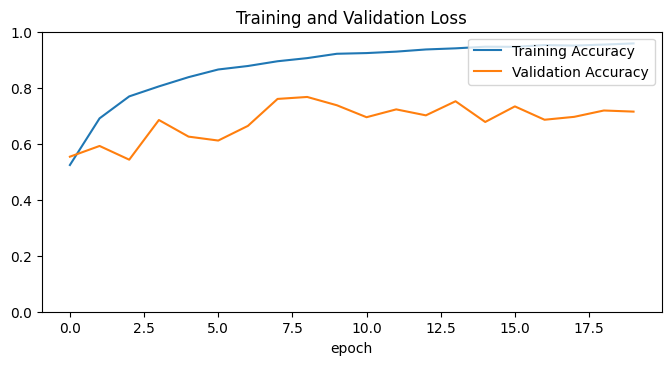

In [26]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [30]:
pred_list = [f"/content/drive/MyDrive/intel image/seg_pred/seg_pred/{i}" for i in os.listdir("/content/drive/MyDrive/intel image/seg_pred/seg_pred") ]
pred_list

['/content/drive/MyDrive/intel image/seg_pred/seg_pred/7104.jpg',
 '/content/drive/MyDrive/intel image/seg_pred/seg_pred/7055.jpg',
 '/content/drive/MyDrive/intel image/seg_pred/seg_pred/7044.jpg',
 '/content/drive/MyDrive/intel image/seg_pred/seg_pred/7109.jpg',
 '/content/drive/MyDrive/intel image/seg_pred/seg_pred/7029.jpg',
 '/content/drive/MyDrive/intel image/seg_pred/seg_pred/7160.jpg',
 '/content/drive/MyDrive/intel image/seg_pred/seg_pred/7089.jpg',
 '/content/drive/MyDrive/intel image/seg_pred/seg_pred/7068.jpg',
 '/content/drive/MyDrive/intel image/seg_pred/seg_pred/7117.jpg',
 '/content/drive/MyDrive/intel image/seg_pred/seg_pred/7050.jpg',
 '/content/drive/MyDrive/intel image/seg_pred/seg_pred/7112.jpg',
 '/content/drive/MyDrive/intel image/seg_pred/seg_pred/7077.jpg',
 '/content/drive/MyDrive/intel image/seg_pred/seg_pred/7025.jpg',
 '/content/drive/MyDrive/intel image/seg_pred/seg_pred/7156.jpg',
 '/content/drive/MyDrive/intel image/seg_pred/seg_pred/7092.jpg',
 '/content

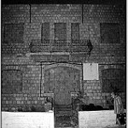

Model Prediction forest


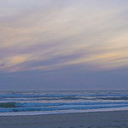

Model Prediction mountain


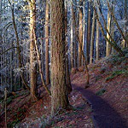

Model Prediction forest


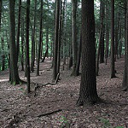

Model Prediction forest


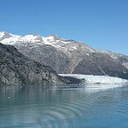

Model Prediction glacier


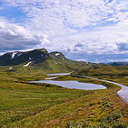

Model Prediction mountain


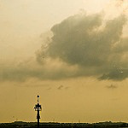

Model Prediction sea


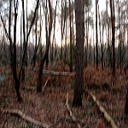

Model Prediction forest


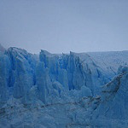

Model Prediction glacier


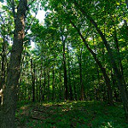

Model Prediction forest


In [61]:
import random
for i in range(10):
  num = random.randint(0,len(pred_list))
  img = Image.open(pred_list[num])
  img = img.resize((128,128))
  display(img)
  img_array = np.array(img)
  img_array = img_array[np.newaxis , :]
  probability = loaded_model(img_array)
  pred = np.argmax(probability)
  print("Model Prediction",indx_to_dict[pred])
  print("=======================")

